# Update metropolis 2020

Update database metropolis according to [SEDATU's](https://www.gob.mx/cms/uploads/sedatu/MM2020_19102023.pdf) 2020 report and analysis.

## Import libraries

In [1]:
import os
import sys

import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/edgaregurrola/.local/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


2023-11-07 16:13:50 Configured OSMnx 1.1.2
2023-11-07 16:13:50 HTTP response caching is on


## Download/Open data

In [2]:
mun_mx = aup.gdf_from_db("mpos_2020","marco")
print(mun_mx.shape)
mun_mx.head(2)

(2469, 5)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,01002,01,002,Asientos,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."


In [3]:
metro_df = pd.read_json('../../data/processed/Metropolis_CVE_2020.json')
metro_df.head(2)

,Aguascalientes,Ensenada,Mexicali,Tijuana,La Paz,Los Cabos,Campeche,Laguna,Monclova,Piedras Negras,...,Tlaxcala,Coatzacoalcos,Cordoba,Minatitlan,Orizaba,Poza Rica,Veracruz,Xalapa,Merida,Zacatecas
mpos,"[01001, 01005, 01011]",[02001],[02002],"[02004, 02005]",[03003],[03008],[04002],"[05017, 05035, 10007, 10012]","[05006, 05010, 05018, 05031]","[05022, 05025]",...,"[29001, 29002, 29003, 29005, 29009, 29010, 290...","[30039, 30082, 30206]","[30014, 30044, 30068, 30113, 30196]","[30048, 30059, 30108, 30120, 30199]","[30006, 30030, 30074, 30081, 30085, 30098, 300...","[30040, 30131, 30175]","[30028, 30090, 30100, 30105, 30193]","[30001, 30026, 30036, 30038, 30065, 30087, 300...","[31002, 31013, 31020, 31038, 31039, 31041, 310...","[32017, 32032, 32050, 32056, 32057]"
edo,[01],[02],[02],[02],[03],[03],[04],"[05, 10]",[05],[05],...,[29],[30],[30],[30],[30],[30],[30],[30],[31],[32]


## Test

In [4]:
metro_gdf = gpd.GeoDataFrame()
for c in metro_df.columns.unique():
    for i in range(len(metro_df.loc["mpos", c])):
        m = metro_df.loc["mpos", c][i]
        tmp_gdf = mun_mx.loc[mun_mx.CVEGEO==m].copy()
        tmp_gdf.loc[:,'city'] = c
        metro_gdf = pd.concat([metro_gdf, tmp_gdf],
        ignore_index = True, axis = 0)
metro_gdf.head(4)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,city
0,01001,01,001,Aguascalientes,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",Aguascalientes
1,01005,01,005,Jesús María,"POLYGON ((-102.33568 22.05067, -102.33348 22.0...",Aguascalientes
2,01011,01,011,San Francisco de los Romo,"POLYGON ((-102.15272 22.08962, -102.15100 22.0...",Aguascalientes
3,02001,02,001,Ensenada,"MULTIPOLYGON (((-115.21788 28.37769, -115.2175...",Ensenada


<AxesSubplot: >

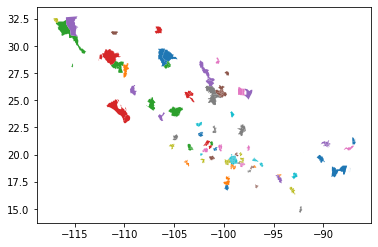

In [5]:
metro_gdf.plot('city')

In [6]:
metro_gdf.shape

(367, 6)

In [7]:
metro_group = metro_gdf.groupby('city').count()
metro_group.head(50)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
city,,,,,
Acapulco,1,1,1,1,1
Aguascalientes,3,3,3,3,3
Campeche,1,1,1,1,1
Cancun,2,2,2,2,2
Celaya,3,3,3,3,3
Chetumal,1,1,1,1,1
Chihuahua,3,3,3,3,3
Chilpancingo,2,2,2,2,2
Ciudad Obregon,1,1,1,1,1


In [8]:
metro_group.tail(20)

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
city,,,,,
Saltillo,3,3,3,3,3
San Martin,5,5,5,5,5
Tampico,5,5,5,5,5
Tapachula,3,3,3,3,3
Tehuacan,2,2,2,2,2
Tepic,2,2,2,2,2
Tijuana,2,2,2,2,2
Tlaxcala,24,24,24,24,24
Toluca,16,16,16,16,16


In [9]:
metro_group.sum()

CVEGEO      367
CVE_ENT     367
CVE_MUN     367
NOMGEO      367
geometry    367
dtype: int64

In [10]:
metro_group.shape

(70, 5)

In [11]:
metro_test = pd.read_csv('../../data/processed/ZM_MM.csv', encoding='latin1')
print(metro_test.shape)
metro_test.head(2)

(70, 2)


,ZONA METROPOLITANA,MUNICIPIOS
0,Aguascalientes,3
1,Tijuana,2


In [12]:
metro_merge = metro_group.reset_index()
metro_merge = metro_group.merge(metro_test, left_on='city',
                               right_on='ZONA METROPOLITANA')
print(metro_merge.shape)
metro_merge.head(4)

(46, 7)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,ZONA METROPOLITANA,MUNICIPIOS
0,1,1,1,1,1,Acapulco,1
1,3,3,3,3,3,Aguascalientes,3
2,1,1,1,1,1,Campeche,1
3,3,3,3,3,3,Celaya,3


## Define CDMX

In [19]:
cdmx_list = ['09002','09003','09004','09005',
            '09006','09007','09008','09009',
            '09010','09011','09012','09012',
            '09013','09014','09015','09016',
            '09017']
metro_gdf.loc[metro_gdf.CVEGEO.isin(cdmx_list),'city'] = 'CDMX'

In [20]:
len(list(metro_gdf.city.unique()))

71

## Upload data

In [21]:
aup.gdf_to_db_slow(metro_gdf, 'metro_gdf_2020','metropolis')